In [49]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from numpy.fft import fft2, fftshift, ifft2
from pathlib import Path
from scipy.ndimage import gaussian_filter, median_filter

DATA_DIR = Path.home() / "Desktop/derp_data/source_polarization"

In [3]:
data = fits.getdata(DATA_DIR / "1500nm")

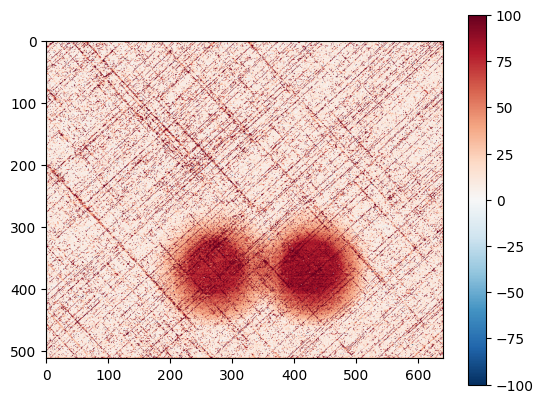

In [9]:
plt.imshow(data, cmap="RdBu_r", vmin=-100, vmax=100)
plt.colorbar()

In [34]:
fft_data = fft2(data)
fft_data = fftshift(fft_data)

data_lowpass = median_filter(data, size=10)

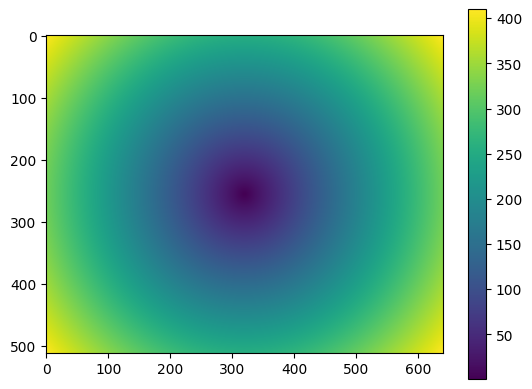

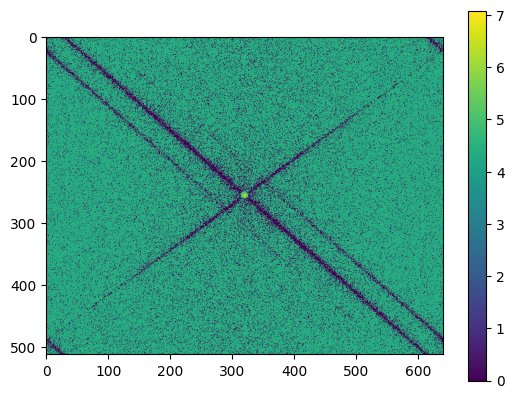

In [67]:
log_spectrum = np.log10(np.abs(fft_data))
mask = np.ones_like(log_spectrum)
mask[log_spectrum > 4.7] = 0

# create small exclusion zone
array_y, array_x = mask.shape
array_x = np.linspace(-array_x/2, array_x/2, array_x)
array_y = np.linspace(-array_y/2, array_y/2, array_y)
array_x, array_y = np.meshgrid(array_x, array_y)
array_r = np.hypot(array_y, array_x)

mask[array_r < 6] = 1

plt.imshow(array_r)
plt.colorbar()
plt.show()
plt.imshow(np.log10(np.abs(fft_data)) * mask)
plt.colorbar()

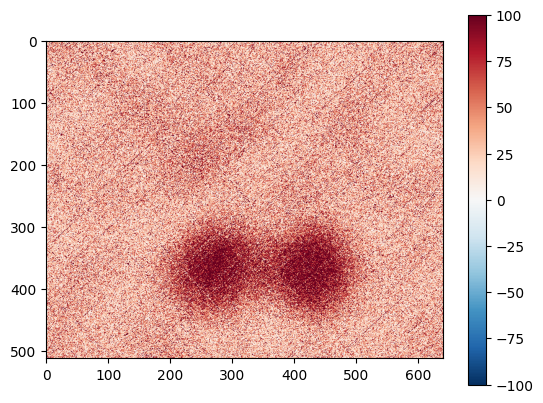

In [68]:
spectrum = fftshift(fft2(data))
lowpass_data = ifft2(mask * spectrum)

plt.imshow(np.abs(lowpass_data), vmax=100, vmin=-100, cmap="RdBu_r")
plt.colorbar()